<a href="https://colab.research.google.com/github/duneag2/intro-dl/blob/main/Assignment5/Uihwan/ass5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # DO NOT run this code!!
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)   # torch는 원래 가지고 있는거야? PyTorch(딥러닝 프레임워크)에서 제공하는 모듈. linear: fully connected layer
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)

relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32) # Batch Normalization for 1D data
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)


# model
# torch.nn.Seqeuntial is kind of a "stack" operation of layers
# We usually apply ReLU after the BN, but it's not a must!
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                              linear2, bn2, relu,
                              linear3).to(device)    # device가 뭔데? gpu??

# Model w.o. BN
# Linear + ReLU is a convention
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [ ]:
# If not using torch.nn.Sequential, you can use class module!

import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # in __init__, initialize the layers you'd like to use
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm1d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # in forward, place the layers sequentially
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# BN 1D
m = nn.BatchNorm1d(100)   # 채널 100개
input = torch.randn(20, 100)  # 20x100 사이즈
output = m(input)  # 100개짜리를 따로따로 20번 정규화 하는 거?

# BN 2D
# So far, we've only used BN 1D
# But what's BN 2D??
m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)  # 20x100x35x45 사이즈
output = m(input)
# torch를 import한 적이 없으니 에러 뜨는게 당연.


NameError: name 'torch' is not defined

배치 노말라이제이션을 1차원, 2차원으로 하는 것.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init

# Quick Question
# Read the document above and write (what? )a line-by-line
# explanation of the code below.

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  # 입력 채널 1, 출력 채널 16, 커널 크기 3x3, 패딩 1 (28 x 28)
            nn.ReLU(),                        # ReLU 활성화 함수
            nn.Conv2d(16, 32, 3, padding=1),  # 입력 채널 16, 출력 채널 32, 커널 크기 3x3, 패딩 1 (28 x 28)
            nn.ReLU(),                        # ReLU 활성화 함수
            nn.MaxPool2d(2, 2),               # 2x2 최대 풀링 (14 x 14)
            nn.Conv2d(32, 64, 3, padding=1),  # 입력 채널 32, 출력 채널 64, 커널 크기 3x3, 패딩 1 (14 x 14)
            nn.ReLU(),                        # ReLU 활성화 함수
            nn.MaxPool2d(2, 2)                # 2x2 최대 풀링 (7 x 7)
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 7 * 7, 100),       # 입력 피처 수 64*7*7, 출력 피처 수 100
            nn.ReLU(),                        # ReLU 활성화 함수
            nn.Linear(100, 10)                # 입력 피처 수 100, 출력 피처 수 10 (클래스 수)
        )

        # 가중치 초기화
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight.data) # Conv2d 가중치를 Kaiming He 초기화
                m.bias.data.fill_(0)               # 편향을 0으로 초기화
            elif isinstance(m, nn.Linear):
                init.kaiming_normal_(m.weight.data) # Linear 가중치를 Kaiming He 초기화
                m.bias.data.fill_(0)               # 편향을 0으로 초기화

    def forward(self, x):
        out = self.layer(x)                 # 합성곱 계층을 통과
        out = out.view(out.size(0), -1)     # 출력을 평탄화 (배치 크기를 유지)
        out = self.fc_layer(out)            # 완전 연결 계층을 통과
        return out

NameError: name 'nn' is not defined

In [6]:
import tensorflow as tf    # 텐서플로: 머신러닝 오픈소스 라이브러
import random
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 객체

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)        # activation func 다 정의해두고

def weight_init(method=None):      # weight init 함수도 정의
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

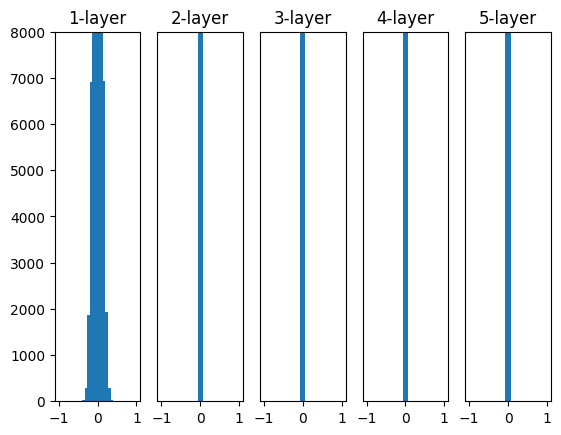

In [8]:
input_data = np.random.randn(1000, 100)   # rand: 0~1 균일 분포 / randn: m=0, sigma = 1 (Gausian) 표준정규분포
node_num = 100   # 100*100 randn
hidden_layer_size = 5
activations = {}

x = input_data    # x = [1000, 100 size random number]

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]    # ??? 이럴거면 x는 인풋데이터로 왜 설정한건데?
        # -> 아 이것도 a에 썼네
        # 그리고 이러면 없는 키를 검색해서 에러날 것 같은데..
        # -> 뭐야 왜 잘 돌아가지?
        # -> 옹 키를 채워 넣었네
        # -> 아아 이렇게 layer를 쌓아나간다고~~

    w = weight_init('small')    # 함수 호출할 때마다 새로운 w
    a = np.dot(x, w) # dot product
    # [1000, 100]*[100, 100]

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z
    # 근데 각 층에서 사용된 w가 어딘가에 저장되어있어야 그걸 업데이트 하는 거 아니야?
    # 활성화함수까지 다 씌운 걸 일일이 저장해둬서 뭐해? 다음 레이어에서만 쓰고 버리면 되는 거 아니야?(역으로 찾앗 쓰긴 번거롭잖아

for i, a in activations.items():   # a: 1000*100
    plt.subplot(1, len(activations), i+1)   # subplot: 서브플롯을 하나씩 생성. 1*5사이즈를 i+1번째에 생성
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1)) # 히스토그램
plt.show()

In [ ]:
len(activations)

5

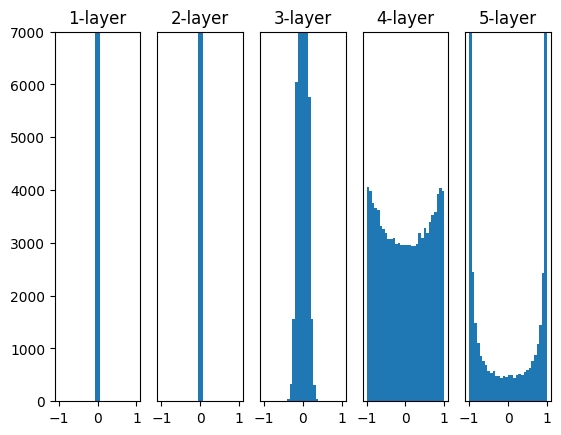

In [9]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

In [ ]:
# Xavier Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

In [ ]:
# He Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
# Question
# Run two cells below and try to explain the
# change of tensor size after passing through the layers
# e.g.) Conv1: [10, 1, 20, 20] -> [10, 3, 16, 16], because --

In [10]:
import torch
import torch.nn as nn      # torch.nn: pytorch의 모듈(클래스).
import torch.nn.functional as F

class CNN(nn.Module):    # nn.Module의 자식 클래스
  def __init__(self):
    super(CNN, self).__init__()   # 조상 클래스 인스턴스 불러오기
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


커널사이즈 5니까 양쪽에 2씩 빠져서 20 ->16

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(10 * 5 * 5, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


2짜리로 맥스풀링 하니까 절반

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


In [4]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))    # 평균, 표준편차  가.... 왜 저걸로 정규화 한 건데?
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 19194341.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 612269.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1192501.37it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1120158.10it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [7]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))


loss of 0 epoch, 0 index : 2.3077847957611084
loss of 0 epoch, 100 index : 1.439955234527588
loss of 0 epoch, 200 index : 0.6279662847518921
loss of 0 epoch, 300 index : 0.3631637692451477
loss of 0 epoch, 400 index : 0.19133588671684265
loss of 0 epoch, 500 index : 0.28032466769218445
loss of 0 epoch, 600 index : 0.14942865073680878
loss of 0 epoch, 700 index : 0.2687755227088928
loss of 0 epoch, 800 index : 0.25085288286209106
loss of 0 epoch, 900 index : 0.08343721181154251
loss of 0 epoch, 1000 index : 0.22365829348564148
loss of 0 epoch, 1100 index : 0.07322219014167786
loss of 1 epoch, 0 index : 0.08291775733232498
loss of 1 epoch, 100 index : 0.09948789328336716
loss of 1 epoch, 200 index : 0.10730327665805817
loss of 1 epoch, 300 index : 0.05861350893974304
loss of 1 epoch, 400 index : 0.0862278863787651
loss of 1 epoch, 500 index : 0.305087149143219
loss of 1 epoch, 600 index : 0.14050336182117462
loss of 1 epoch, 700 index : 0.055752772837877274
loss of 1 epoch, 800 index : 0

In [ ]:
# Quick Question
# Write an explanation of the code below (evaluation cell only!)

In [8]:
cnn.eval()       # cnn의 모든 레이어를 eval 모드에 들어가게 해줌. 학습할 때 사용하는 것들(drop out, batch normal..)을 비활성화 함.
test_loss = 0
correct = 0
with torch.no_grad():    # autograd engine을 끔.
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



Test set: Average loss: 6.2634, Accuracy: 9903/10000 (99%)

